 + sự khác biệt chiều cao trong các vị trí thi đấu không?
 + cầu thủ bóng đá thường đạt đỉnh cao ở nhóm tuổi nào? (age, position, market_value)
 + cầu thủ chạy cánh thuận chân hay nghịch chân thì cho ra hiệu suất cao hơn?
 + cầu thủ có xu hướng thi đấu cho nơi sinh ra hay đại diện quốc gia khác?
 + Giải đấu/Club nào đang đóng vai trò là 'kho cung cấp hàng giá rẻ chất lượng cao' (Best Value Feeder Leagues) cho Top 5 giải đấu hàng đầu Châu Âu?
 

# PHÂN TÍCH DỮ LIỆU & CÂU HỎI NGHIÊN CỨU

## 1. The Biomechanics of Position: Phân tích sự khác biệt chiều cao
**Câu hỏi nghiên cứu:** Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí thi đấu không? (Physical Profiling)

Trong phần này, chúng ta sẽ sử dụng biểu đồ Boxplot để trực quan hóa phân phối chiều cao theo từng vị trí cụ thể (`sub_position`). Đồng thời, sử dụng kiểm định ANOVA (Analysis of Variance) để xác định xem sự khác biệt về chiều cao trung bình giữa các nhóm vị trí này có ý nghĩa thống kê hay không. Điều này giúp trả lời câu hỏi liệu thể hình (chiều cao) còn là yếu tố tiên quyết cho các vị trí trong bóng đá hiện đại.

Phương pháp:

Phân tích mô tả: Mean, Median, Std của chiều cao theo từng vị trí
Kiểm định thống kê: ANOVA test để kiểm tra sự khác biệt có ý nghĩa thống kê
Visualizations: Boxplot, violin plot, bar chart
Output mong đợi:

Bảng thống kê chiều cao theo vị trí
P-value từ ANOVA test
2-3 biểu đồ trực quan
Kết luận về vị trí nào cao nhất/thấp nhất

In [15]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
# Đọc dataset
df = pd.read_csv('../data/players_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


,name,age_at_last_season,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,current_club_name,current_club_domestic_competition_id,club_position,last_season,contract_expiration_date,market_value_in_eur,agent_name,total_goals,total_assists,total_minutes_played,total_yellow_cards,total_red_cards
0,Miroslav Klose,37.0,Poland,Germany,Attack,Centre-Forward,right,184.0,Società Sportiva Lazio S.p.A.,serie-a,8.0,2015,NaN,1000000.0,ASBW Sport Marketing,12,8,2429,6,0
1,Roman Weidenfeller,37.0,Germany,Germany,Goalkeeper,Goalkeeper,left,190.0,Borussia Dortmund,bundesliga,4.0,2017,NaN,750000.0,Neubauer 13 GmbH,0,0,181,0,0
2,Dimitar Berbatov,34.0,Bulgaria,Bulgaria,Attack,Centre-Forward,NaN,NaN,Panthessalonikios Athlitikos Omilos Konstantin...,super-league-1,NaN,2015,NaN,1000000.0,CSKA-AS-23 Ltd.,6,0,1656,0,0
3,Lúcio,34.0,Brazil,Brazil,Defender,Centre-Back,NaN,NaN,Juventus Football Club,serie-a,1.0,2012,NaN,200000.0,NaN,0,0,307,0,0
4,Tom Starke,36.0,East Germany (GDR),Germany,Goalkeeper,Goalkeeper,right,194.0,FC Bayern München,bundesliga,NaN,2017,NaN,100000.0,IFM,0,0,450,0,0


Số dòng: 32601
Số cột: 20
Overall size: 22.95 MB


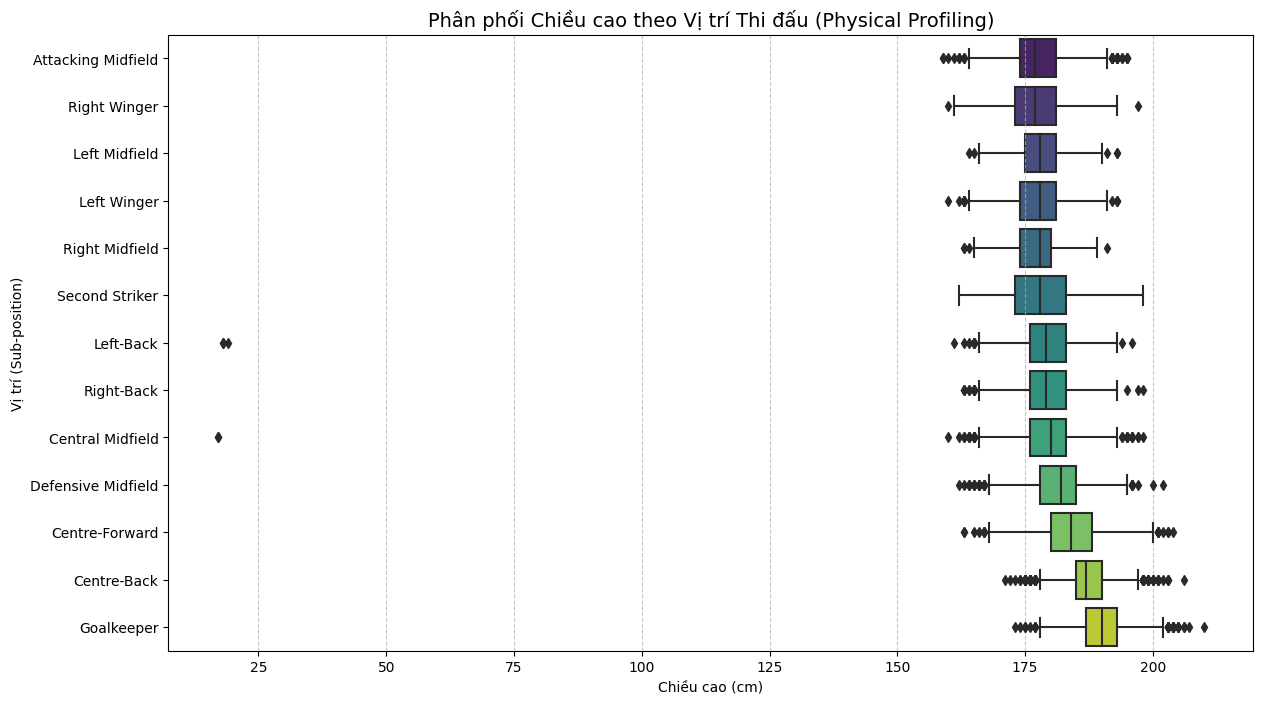

Kết quả ANOVA Test:
F-statistic: 1588.58
P-value: 0.0
=> Kết luận: Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí thi đấu.


In [7]:
from scipy.stats import f_oneway

# 1. Xử lý dữ liệu: Loại bỏ các giá trị thiếu ở cột chiều cao và vị trí
height_df = df.dropna(subset=['height_in_cm', 'sub_position']).copy()

# 2. Trực quan hóa: Boxplot chiều cao theo vị trí chi tiết
plt.figure(figsize=(14, 8))
sns.boxplot(data=height_df, x='height_in_cm', y='sub_position', palette='viridis', order=height_df.groupby('sub_position')['height_in_cm'].median().sort_values().index)
plt.title('Phân phối Chiều cao theo Vị trí Thi đấu (Physical Profiling)', fontsize=14)
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Vị trí (Sub-position)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Phân tích thống kê: ANOVA Test
# Gom nhóm chiều cao theo vị trí
groups = [group['height_in_cm'].values for name, group in height_df.groupby('sub_position')]

# Thực hiện kiểm định F-oneway ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"Kết quả ANOVA Test:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("=> Kết luận: Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí thi đấu.")
else:
    print("=> Kết luận: Không đủ bằng chứng để bác bỏ giả thuyết các vị trí có chiều cao như nhau.")

In [16]:
print("=" * 80)
print("CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU")
print("=" * 80)

# Loại bỏ outliers chiều cao (dưới 150cm hoặc trên 210cm)
df_height = df[(df['height_in_cm'] >= 150) & (df['height_in_cm'] <= 210)].copy()

# Thống kê mô tả
height_stats = df_height.groupby('position')['height_in_cm'].agg([
    ('Số lượng', 'count'),
    ('Trung bình', 'mean'),
    ('Trung vị', 'median'),
    ('Độ lệch chuẩn', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2).sort_values('Trung bình', ascending=False)

print("\nTHỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:")
print(height_stats)

# Kiểm định ANOVA
positions_list = [df_height[df_height['position'] == pos]['height_in_cm'].dropna() 
                  for pos in df_height['position'].unique()]
f_statistic, p_value = stats.f_oneway(*positions_list)

print(f"\nKIỂM ĐỊNH ANOVA:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("✓ Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)")
else:
    print("✗ Không có sự khác biệt có ý nghĩa thống kê (p >= 0.05)")

# Post-hoc test: Tukey HSD
from scipy.stats import tukey_hsd
positions = df_height['position'].values
heights = df_height['height_in_cm'].values
res = tukey_hsd(*[df_height[df_height['position'] == pos]['height_in_cm'].values 
                  for pos in sorted(df_height['position'].unique())])
print(f"\nPost-hoc Tukey HSD test completed")

CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU

THỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:
            Số lượng  Trung bình  Trung vị  Độ lệch chuẩn    Min    Max
position                                                               
Goalkeeper      3415      189.68     190.0           4.55  173.0  210.0
Defender        9673      183.69     184.0           6.07  161.0  206.0
Attack          8401      180.77     181.0           6.50  160.0  204.0
Missing          106      179.82     180.0           5.82  166.0  196.0
Midfield        8745      179.45     180.0           5.71  159.0  202.0

KIỂM ĐỊNH ANOVA:
F-statistic: 2094.9376
P-value: 0.0000e+00
✓ Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)

Post-hoc Tukey HSD test completed


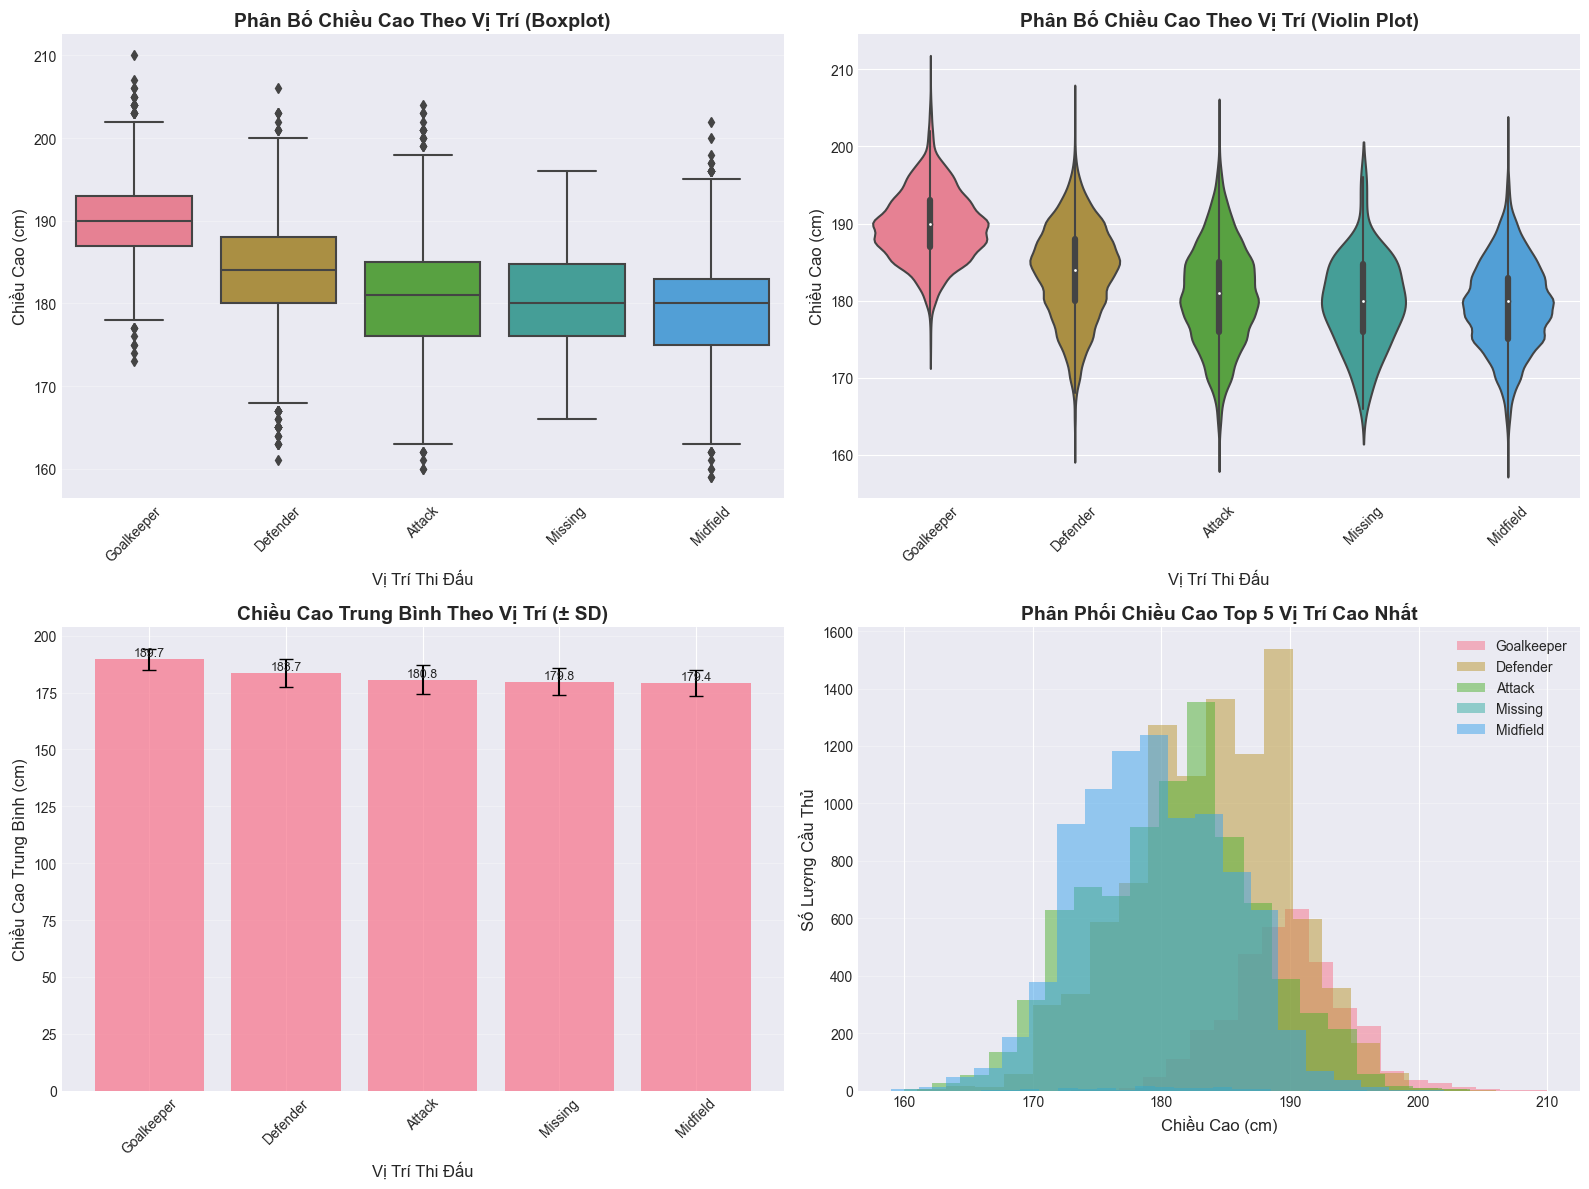


✓ Đã lưu biểu đồ: q1_height_analysis.png


In [17]:
# Tạo figure với multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Boxplot
ax1 = axes[0, 0]
position_order = height_stats.index.tolist()
sns.boxplot(data=df_height, x='position', y='height_in_cm', order=position_order, ax=ax1)
ax1.set_title('Phân Bố Chiều Cao Theo Vị Trí (Boxplot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Vị Trí Thi Đấu', fontsize=12)
ax1.set_ylabel('Chiều Cao (cm)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Violin plot
ax2 = axes[0, 1]
sns.violinplot(data=df_height, x='position', y='height_in_cm', order=position_order, ax=ax2)
ax2.set_title('Phân Bố Chiều Cao Theo Vị Trí (Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Vị Trí Thi Đấu', fontsize=12)
ax2.set_ylabel('Chiều Cao (cm)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Bar chart với error bars
ax3 = axes[1, 0]
height_stats_plot = height_stats.reset_index()
bars = ax3.bar(range(len(height_stats_plot)), height_stats_plot['Trung bình'], 
               yerr=height_stats_plot['Độ lệch chuẩn'], capsize=5, alpha=0.7)
ax3.set_xticks(range(len(height_stats_plot)))
ax3.set_xticklabels(height_stats_plot['position'], rotation=45)
ax3.set_title('Chiều Cao Trung Bình Theo Vị Trí (± SD)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Vị Trí Thi Đấu', fontsize=12)
ax3.set_ylabel('Chiều Cao Trung Bình (cm)', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

# Thêm giá trị lên bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=9)

# Plot 4: Distribution histogram
ax4 = axes[1, 1]
for position in height_stats.head(5).index:
    data = df_height[df_height['position'] == position]['height_in_cm']
    ax4.hist(data, alpha=0.5, label=position, bins=20)
ax4.set_title('Phân Phối Chiều Cao Top 5 Vị Trí Cao Nhất', fontsize=14, fontweight='bold')
ax4.set_xlabel('Chiều Cao (cm)', fontsize=12)
ax4.set_ylabel('Số Lượng Cầu Thủ', fontsize=12)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('q1_height_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Đã lưu biểu đồ: q1_height_analysis.png")

## 2.4.2 The Golden Window: Đường cong lão hóa (Aging Curve)
**Câu hỏi nghiên cứu:** Cầu thủ bóng đá thường đạt đỉnh cao ở nhóm tuổi nào? (Mapping the Prime)

Chúng ta sẽ phân tích mối quan hệ giữa `age_at_last_season` và `market_value_in_eur` (đại diện cho giá trị/phong độ cầu thủ). Biểu đồ đường (Line Plot) với khoảng tin cậy sẽ giúp xác định "cửa sổ vàng" - độ tuổi mà cầu thủ có giá trị thị trường cao nhất cho từng tuyến thi đấu (Thủ môn, Hậu vệ, Tiền vệ, Tiền đạo).

Phương pháp:

Phân tích giá trị thị trường trung bình theo tuổi và vị trí
Machine Learning: Train regression models để dự đoán market value dựa trên age, position
Models: Linear Regression, Random Forest, Gradient Boosting
Evaluation: R², RMSE, MAE

Output mong đợi:

Line chart: market value theo tuổi
Heatmap: market value theo tuổi và vị trí
Model comparison table
Feature importance chart

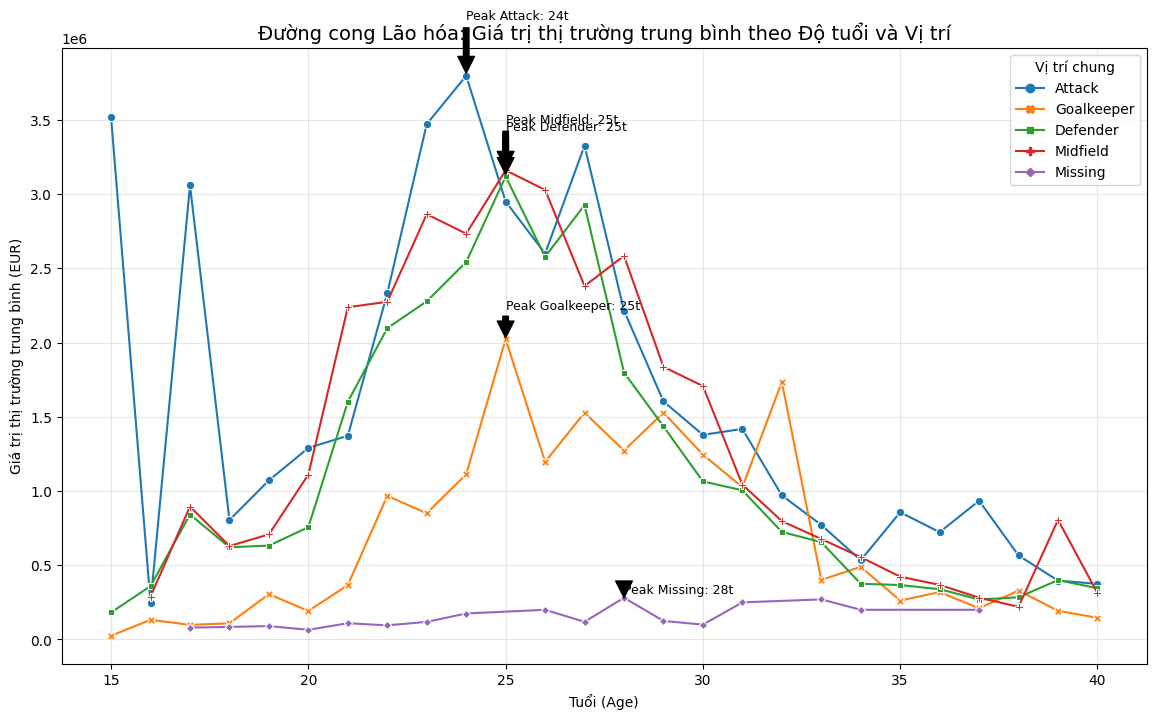

In [8]:
# 1. Xử lý dữ liệu: Lọc các giá trị nhiễu (ví dụ: tuổi quá cao hoặc market value = 0)
age_value_df = df[(df['market_value_in_eur'] > 0) & (df['age_at_last_season'] <= 40)].copy()

# 2. Trực quan hóa: Biểu đồ xu hướng giá trị theo độ tuổi và vị trí
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_value_df, x='age_at_last_season', y='market_value_in_eur', hue='position', style='position', markers=True, dashes=False, ci=None)

plt.title('Đường cong Lão hóa: Giá trị thị trường trung bình theo Độ tuổi và Vị trí', fontsize=14)
plt.xlabel('Tuổi (Age)')
plt.ylabel('Giá trị thị trường trung bình (EUR)')
plt.legend(title='Vị trí chung')
plt.grid(True, alpha=0.3)

# Đánh dấu đỉnh cao (Peak) cho từng đường
positions = age_value_df['position'].unique()
for pos in positions:
    pos_data = age_value_df[age_value_df['position'] == pos].groupby('age_at_last_season')['market_value_in_eur'].mean()
    peak_age = pos_data.idxmax()
    peak_value = pos_data.max()
    plt.annotate(f'Peak {pos}: {int(peak_age)}t', xy=(peak_age, peak_value), xytext=(peak_age, peak_value*1.1),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)

plt.show()

In [21]:
print("=" * 80)
print("CÂU HỎI 2: CẦU THỦ ĐẠT ĐỈNH CAO Ở NHÓM TUỔI NÀO?")
print("=" * 80)


df['age_group'] = pd.cut(
    df['age_at_last_season'],
    bins=[0, 20, 23, 26, 29, 32, 100],
    labels=['U20', '21-23', '24-26', '27-29', '30-32', '33+']
)

# Lọc dữ liệu: chỉ lấy cầu thủ có market value > 0
df_peak = df[df['market_value_in_eur'] > 0].copy()

print(f"Số cầu thủ có market value > 0: {len(df_peak):,}")

# Thống kê market value theo tuổi
age_value_stats = df_peak.groupby('age_at_last_season')['market_value_in_eur'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nGIÁ TRỊ THỊ TRƯỜNG TRUNG BÌNH THEO TUỔI:")
print(age_value_stats.head(10))

# Tìm tuổi có market value cao nhất
peak_age = age_value_stats['mean'].idxmax()
peak_value = age_value_stats['mean'].max()

print(f"\n→ Tuổi đỉnh cao (theo mean): {peak_age} tuổi (€{peak_value:,.0f})")


# Phân tích theo nhóm tuổi
age_group_stats = df_peak.groupby('age_group')['market_value_in_eur'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median')
]).round(2).sort_values('mean', ascending=False)

print("\nGIÁ TRỊ THỊ TRƯỜNG THEO NHÓM TUỔI:")
print(age_group_stats)

# Phân tích theo vị trí
position_age_stats = df_peak.groupby(['position', 'age_group'])['market_value_in_eur'].mean().unstack(fill_value=0)

print("\nGIÁ TRỊ TRUNG BÌNH THEO VỊ TRÍ VÀ NHÓM TUỔI:")
print(position_age_stats.round(0))

CÂU HỎI 2: CẦU THỦ ĐẠT ĐỈNH CAO Ở NHÓM TUỔI NÀO?
Số cầu thủ có market value > 0: 31,078

GIÁ TRỊ THỊ TRƯỜNG TRUNG BÌNH THEO TUỔI:
                    count        mean    median          std
age_at_last_season                                          
15.0                    9  1276111.11  150000.0   3274371.87
16.0                   78   263076.92   75000.0    534809.25
17.0                  451  1262294.90  100000.0   9876977.20
18.0                 1726   594968.13  100000.0   2879804.83
19.0                 2578   731916.21  125000.0   3361603.65
20.0                 2640   953509.47  150000.0   4141883.49
21.0                 2366  1613655.96  200000.0   7330268.39
22.0                 2176  2098138.79  262500.0   7434458.21
23.0                 1913  2643964.98  350000.0   8633540.59
24.0                 1907  2860985.84  375000.0  10203121.46

→ Tuổi đỉnh cao (theo mean): 25.0 tuổi (€2,980,828)

GIÁ TRỊ THỊ TRƯỜNG THEO NHÓM TUỔI:
           count        mean    median
age_group 

## 2.4.3 The Inverted Winger Hypothesis: Kèo trái hay Kèo phải?
**Câu hỏi nghiên cứu:** Cầu thủ chạy cánh thuận chân hay nghịch chân thì cho ra hiệu suất cao hơn? (Tactical Evolution)

Phần này sẽ phân loại các cầu thủ chạy cánh (Wingers) thành hai nhóm:
- **Inverted Winger (Cánh nghịch chân):** Ví dụ: Đá cánh trái nhưng thuận chân phải.
- **Traditional Winger (Cánh thuận chân):** Ví dụ: Đá cánh trái thuận chân trái.

Chúng ta sẽ so sánh chỉ số "Đóng góp bàn thắng mỗi 90 phút" (Goal Contributions per 90) giữa hai nhóm này để tìm ra xu hướng hiệu quả hơn.

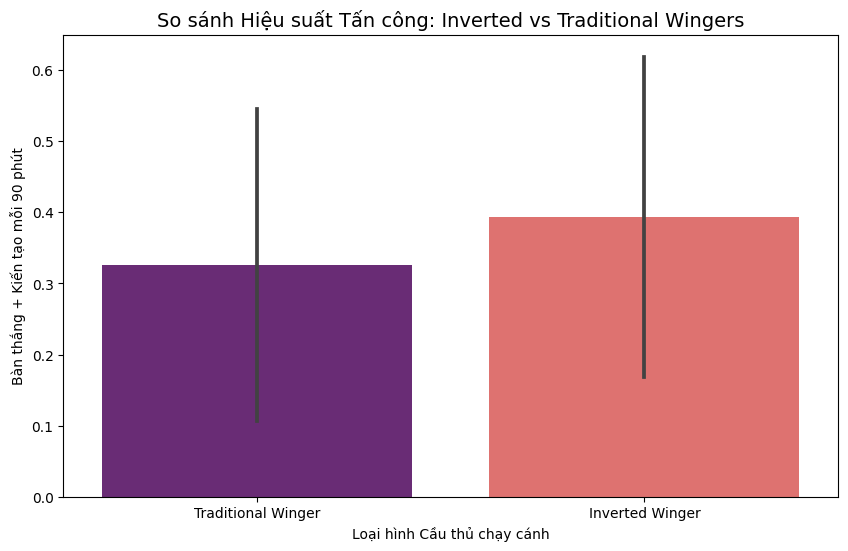

                    count      mean       std
winger_type                                  
Inverted Winger     891.0  0.393519  0.225447
Traditional Winger  587.0  0.326296  0.219483


In [9]:
# 1. Lọc dữ liệu: Chỉ lấy cầu thủ chạy cánh (Winger)
wingers = df[df['sub_position'].isin(['Left Winger', 'Right Winger'])].dropna(subset=['foot']).copy()

# 2. Định nghĩa hàm phân loại
def classify_winger(row):
    if (row['sub_position'] == 'Left Winger' and row['foot'] == 'right') or \
       (row['sub_position'] == 'Right Winger' and row['foot'] == 'left'):
        return 'Inverted Winger'
    elif (row['sub_position'] == 'Left Winger' and row['foot'] == 'left') or \
         (row['sub_position'] == 'Right Winger' and row['foot'] == 'right'):
        return 'Traditional Winger'
    else:
        return 'Ambidextrous/Unknown'

wingers['winger_type'] = wingers.apply(classify_winger, axis=1)

# Loại bỏ nhóm không xác định
wingers = wingers[wingers['winger_type'] != 'Ambidextrous/Unknown']

# 3. Tính toán hiệu suất (Goal + Assist) mỗi 90 phút
# Chỉ tính cầu thủ đá trên 500 phút để tránh nhiễu
wingers = wingers[wingers['total_minutes_played'] > 500].copy()
wingers['contributions_per_90'] = (wingers['total_goals'] + wingers['total_assists']) / (wingers['total_minutes_played'] / 90)

# 4. Trực quan hóa và So sánh
plt.figure(figsize=(10, 6))
sns.barplot(data=wingers, x='winger_type', y='contributions_per_90', estimator=lambda x: sum(x)/len(x), errorbar='sd', palette='magma')
plt.title('So sánh Hiệu suất Tấn công: Inverted vs Traditional Wingers', fontsize=14)
plt.ylabel('Bàn thắng + Kiến tạo mỗi 90 phút')
plt.xlabel('Loại hình Cầu thủ chạy cánh')
plt.show()

# In ra giá trị trung bình
print(wingers.groupby('winger_type')['contributions_per_90'].describe()[['count', 'mean', 'std']])

## 2.4.4 Talent Diasporas: Bản đồ di cư của tài năng
**Câu hỏi nghiên cứu:** Cầu thủ có xu hướng thi đấu cho nơi sinh ra hay đại diện quốc gia khác? (Globalization of Talent)

Chúng ta sẽ xác định tỷ lệ cầu thủ là "Diaspora" (Việt kiều/Kiều bào - sinh ra ở một nước nhưng thi đấu cho tuyển quốc gia nước khác). Biểu đồ sẽ hiển thị top các quốc gia "xuất khẩu" tài năng bóng đá nhiều nhất (nơi sinh ra của các cầu thủ thi đấu cho nước khác).

Tỷ lệ cầu thủ thi đấu cho quốc gia khác nơi sinh: 17.19%


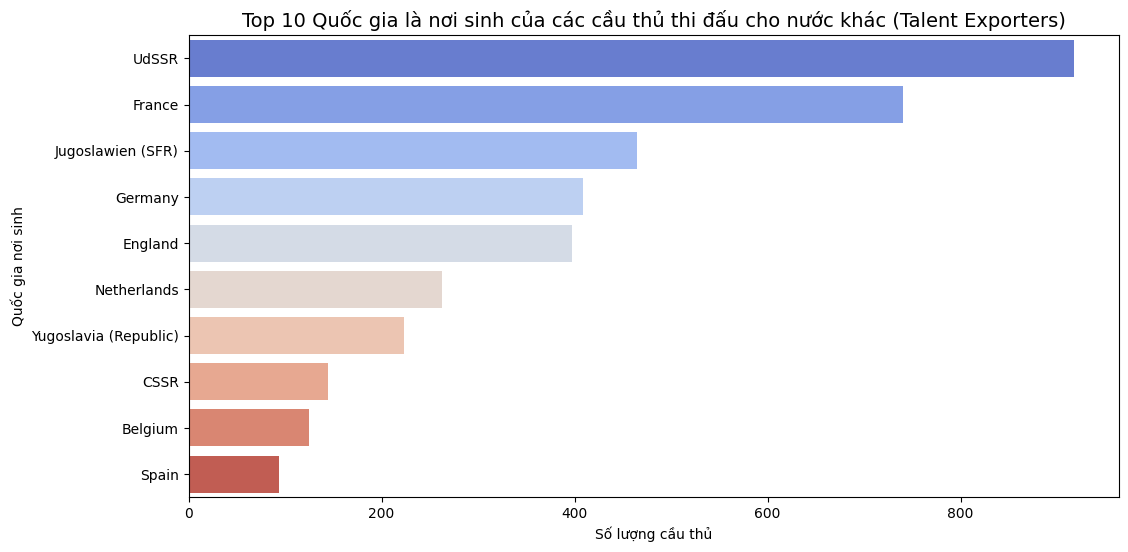

In [10]:
# 1. Xử lý dữ liệu: Loại bỏ dòng thiếu thông tin quốc gia
diaspora_df = df.dropna(subset=['country_of_birth', 'country_of_citizenship']).copy()

# Xác định cầu thủ Diaspora (Nơi sinh != Quốc tịch)
# Lưu ý: Dữ liệu có thể có nhiều quốc tịch, ta so sánh chuỗi chính
diaspora_df['is_diaspora'] = diaspora_df['country_of_birth'] != diaspora_df['country_of_citizenship']

# Tính tỷ lệ chung
diaspora_rate = diaspora_df['is_diaspora'].mean() * 100
print(f"Tỷ lệ cầu thủ thi đấu cho quốc gia khác nơi sinh: {diaspora_rate:.2f}%")

# 2. Tìm các quốc gia 'xuất khẩu' tài năng nhiều nhất (Nơi sinh của các cầu thủ Diaspora)
exporting_countries = diaspora_df[diaspora_df['is_diaspora']]['country_of_birth'].value_counts().head(10)

# 3. Trực quan hóa
plt.figure(figsize=(12, 6))
sns.barplot(x=exporting_countries.values, y=exporting_countries.index, palette='coolwarm')
plt.title('Top 10 Quốc gia là nơi sinh của các cầu thủ thi đấu cho nước khác (Talent Exporters)', fontsize=14)
plt.xlabel('Số lượng cầu thủ')
plt.ylabel('Quốc gia nơi sinh')
plt.show()

## 2.4.5 Moneyball Hunting Grounds: Tìm kiếm 'Kho hàng giá rẻ chất lượng cao'
**Câu hỏi nghiên cứu:** Giải đấu nào đang đóng vai trò là "Feeder Leagues" hiệu quả nhất cho Top 5 giải đấu hàng đầu Châu Âu?

Chúng ta định nghĩa "Top 5 Leagues" gồm: Premier League, La Liga, Bundesliga, Serie A, Ligue 1.
Mục tiêu là tìm ra các giải đấu còn lại (Non-Top 5) có chỉ số **"Value for Money"** tốt nhất.
Chỉ số này được tính bằng: `(Tổng Bàn thắng + Kiến tạo) / Giá trị thị trường`. Giải đấu nào có chỉ số này cao tức là cầu thủ ở đó tạo ra nhiều đầu ra tấn công với mức giá rẻ => Mỏ vàng tiềm năng.

Phương pháp:

Xác định Top 5 giải đấu Châu Âu (thường là: Premier League, La Liga, Bundesliga, Serie A, Ligue 1)
Tính "value score" = performance / market_value
Phân tích giải đấu cung cấp cầu thủ "giá rẻ chất lượng cao" cho Top 5
Machine Learning: Train model để dự đoán "hidden gems"

Output mong đợi:

Ranking leagues theo value score
Scatter plot: performance vs market value
Network graph: flow của cầu thủ
ML model để identify undervalued players

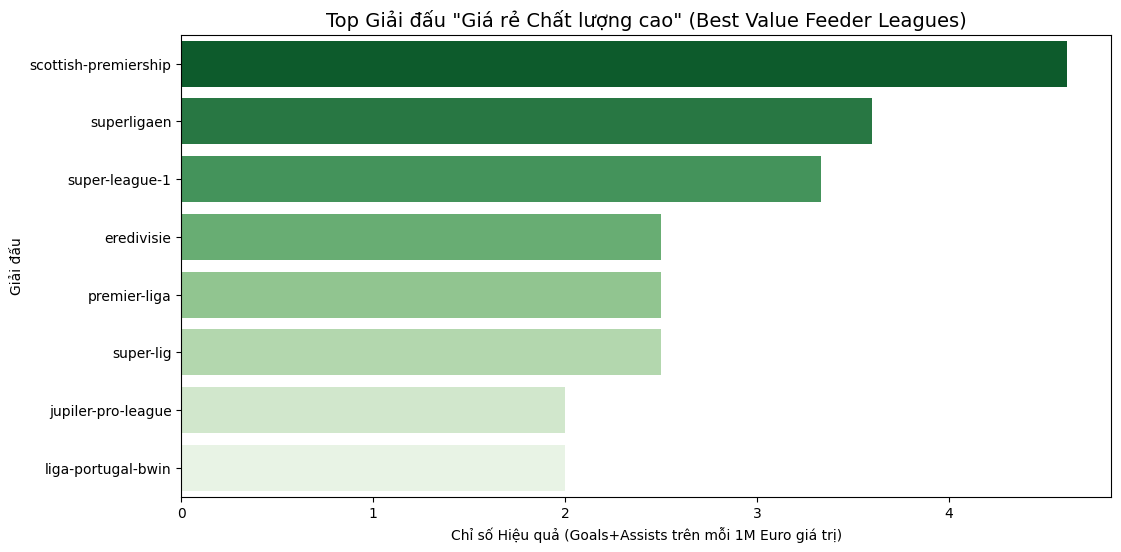

Giải thích: Giá trị trục X càng cao nghĩa là cầu thủ tại giải đó đóng góp càng nhiều bàn thắng/kiến tạo so với mức giá thị trường của họ.


In [11]:
# 1. Định nghĩa Top 5 Leagues
top_5_leagues = ['premier-league', 'laliga', 'bundesliga', 'serie-a', 'ligue-1']

# 2. Lọc dữ liệu: Chỉ lấy cầu thủ ở giải Non-Top 5, đá > 500 phút, có market value
feeder_candidates = df[
    (~df['current_club_domestic_competition_id'].isin(top_5_leagues)) &
    (df['total_minutes_played'] > 500) &
    (df['market_value_in_eur'] > 100000) # Lọc cầu thủ quá rẻ/nghiệp dư để tránh nhiễu chỉ số
].copy()

# 3. Tính chỉ số ROI (Return on Investment) giả định
# Metric: (Goals + Assists) / Market Value (triệu Euro)
feeder_candidates['performance'] = feeder_candidates['total_goals'] + feeder_candidates['total_assists']
feeder_candidates['roi_index'] = feeder_candidates['performance'] / (feeder_candidates['market_value_in_eur'] / 1000000)

# Gom nhóm theo giải đấu và tính trung bình ROI
league_roi = feeder_candidates.groupby('current_club_domestic_competition_id')['roi_index'].median().sort_values(ascending=False).head(10)

# 4. Trực quan hóa
plt.figure(figsize=(12, 6))
sns.barplot(x=league_roi.values, y=league_roi.index, palette='Greens_r')
plt.title('Top Giải đấu "Giá rẻ Chất lượng cao" (Best Value Feeder Leagues)', fontsize=14)
plt.xlabel('Chỉ số Hiệu quả (Goals+Assists trên mỗi 1M Euro giá trị)')
plt.ylabel('Giải đấu')
plt.show()

print("Giải thích: Giá trị trục X càng cao nghĩa là cầu thủ tại giải đó đóng góp càng nhiều bàn thắng/kiến tạo so với mức giá thị trường của họ.")

In [25]:
print("=" * 80)
print("CÂU HỎI 5: BEST VALUE FEEDER LEAGUES")
print("=" * 80)

# Xác định Top 5 Leagues Châu Âu (thường là những giải có domestic_competition_id phổ biến nhất)
# Giả định: Top 5 leagues dựa trên số lượng cầu thủ có market value cao

top5_criteria = df[df['market_value_in_eur'] > 1000000].groupby(
    'current_club_domestic_competition_id'
).size().sort_values(ascending=False).head(5)

print("TOP 5 LEAGUES (dựa trên số cầu thủ giá trị cao):")
print(top5_criteria)

top5_league_ids = top5_criteria.index.tolist()
print(f"\nTop 5 League IDs: {top5_league_ids}")

# Phân tích các giải đấu còn lại (potential feeder leagues)
df_feeder = df[
    (~df['current_club_domestic_competition_id'].isin(top5_league_ids)) &
    (df['market_value_in_eur'] > 0) &
    (df['total_minutes_played'] >= 900)  # Tối thiểu 10 trận
].copy()

print(f"\nSố cầu thủ từ feeder leagues: {len(df_feeder):,}")

# Tính Value Score = Performance / Market Value
# Performance = weighted sum of goals, assists, minutes
df_feeder['performance_score'] = (
    df_feeder['total_goals'] * 3 +  # Goals có trọng số cao hơn
    df_feeder['total_assists'] * 2 +
    (df_feeder['total_minutes_played'] / 3420) * 1  # Normalize minutes (3420 = full season)
)

# Value per euro (càng cao càng tốt)
df_feeder['value_per_euro'] = df_feeder['performance_score'] / (df_feeder['market_value_in_eur'] + 1)

# Aggregate theo league
feeder_league_stats = df_feeder.groupby('current_club_domestic_competition_id').agg({
    'name': 'count',
    'performance_score': 'mean',
    'market_value_in_eur': 'mean',
    'value_per_euro': 'mean',
    'total_goals': 'mean',
    'total_assists': 'mean'
}).rename(columns={'name': 'player_count'})

# Lọc leagues có ít nhất 20 cầu thủ
feeder_league_stats = feeder_league_stats[feeder_league_stats['player_count'] >= 20]

# Sắp xếp theo value_per_euro
feeder_league_stats = feeder_league_stats.sort_values('value_per_euro', ascending=False)

print("\n" + "=" * 80)
print("TOP 10 BEST VALUE FEEDER LEAGUES")
print("=" * 80)
print(feeder_league_stats.head(10))

# Phân tích cầu thủ "hidden gems" - high performance, low value
df_feeder['gem_score'] = (
    (df_feeder['performance_score'] - df_feeder['performance_score'].mean()) / df_feeder['performance_score'].std() -
    (df_feeder['market_value_in_eur'] - df_feeder['market_value_in_eur'].mean()) / df_feeder['market_value_in_eur'].std()
)

top_gems = df_feeder.nlargest(20, 'gem_score')[
    ['name', 'age_at_last_season', 'position', 'current_club_domestic_competition_id',
     'performance_score', 'market_value_in_eur', 'gem_score']
]

print("\n" + "=" * 80)
print("TOP 20 HIDDEN GEMS (High Performance, Low Value)")
print("=" * 80)
print(top_gems.to_string(index=False))

CÂU HỎI 5: BEST VALUE FEEDER LEAGUES
TOP 5 LEAGUES (dựa trên số cầu thủ giá trị cao):
current_club_domestic_competition_id
premier-league    813
serie-a           722
laliga            684
bundesliga        583
ligue-1           578
dtype: int64

Top 5 League IDs: ['premier-league', 'serie-a', 'laliga', 'bundesliga', 'ligue-1']

Số cầu thủ từ feeder leagues: 6,006

TOP 10 BEST VALUE FEEDER LEAGUES
                                      player_count  performance_score  \
current_club_domestic_competition_id                                    
super-lig                                      888          11.105377   
scottish-premiership                           588          10.123548   
super-league-1                                 803           8.357975   
superligaen                                    492          10.187669   
liga-portugal-bwin                             743           9.537812   
premier-liga                                  1195           9.171461   
eredivisie     